# Getting to know your data

## Data Cleaning Checklist

1. Deal with column names
2. Deal with text columns
3. Deal with numeric columns
4. Deal with dates
5. Look at relationships between columns

## Data Cleaning Step 1 - Dealing with column names

#### Necessary Steps

* Carefully inspect the names 
* Strip whitespace
* Replace spaces with `_`
* Remove other offending characters
    * Punctuation
    * Latin symbols like å
* Make sure column names are unique
* Inspect the column type.  Anything unexpected?
* **Advanced** Is there measurement data in the labels?  If so, you need to reshape

#### Optional Steps

* Make all lowercase 
* Add prefix 
    * if combining with another table 
* Look for other ways to make them meaningful but short

## Data Cleaning Step 2 - Dealing with a numeric column

#### Necessary steps

* Inspect numeric summaries.  Do they make sense?
* Plot a histogram.  Anything unusual?
* Look at the min/max values.  Are they reasonable?
* Think about practical bounds
    * 0 <= percent <= 100
    * 0 <= fraction <= 1
    * Height > 0
* How are missing values represented?  Is if consistent?
    * Watch out for `0` in place of missing.
    

#### Optional steps

* Apply a log/sqrt transform to skewed data
* Remove outliers?
* Impute missing values?

## Data Cleaning Step 3 - Dealing with a text column

#### Necessary steps

* Inspect a list of unique labels and their counts
    * Look at the most common and fix common errors
    * Look at the least common, odd cases hide here
* Plot the frequency distribution.  Anything unusual?
* How are missing data represented?  Is it consistent?
    * Switch to `np.NaN` (Pandas), `None` (pure Python), `null` (Spark SQL)
* Look for and fix similarities in the labels
    * i.e. "Todd" vs. "todd"

#### Optional steps

* Consider switching to lowercase
* Consider adding a `"Other"` category for rare labels
* Consider recoding into broader categories

## Data Cleaning Step 4 - Dealing with a date column

#### Necessary steps

* Is the formating consistent?
* Correct conversion?
    * Two digit year?  How is this converted?
* Make columns for various date-parts
    * year
    * month
    * day
    * etc.
* Make plots of the date-parts and look for unusual values

## Data Cleaning Step 5 - Inspect relationship between columns

#### Necessary steps

* Compute cross-tabulated summary methods
    * **Text + Numeric** Group-by mean/median/SD/IQR
    * **Text + Text** Group-by counts/percents
* Plot the relationship
    * **Text + Numeric** side-by-side box plot
    * **Text + Text** mosiac plot
    * **Numeric + Numeric** scatter plot
* Look for unusual values.
    * i.e. `0` as missing often shows up in scatterplots

## Basic inspection tools

* `df.head()`        first five rows
* `df.tail()`        last five rows
* `df.sample(5)`     random sample of rows
* `df.shape`         number of rows/columns in a tuple
* `df.describe()`    calculates measures of central tendency
* `df.info()`

## <font color="red"> Exercise 1: Load and inspect the artwork from MoMA </font>

Make sure you can load both the csv and json files

[Data source](https://github.com/MuseumofModernArt/collection)

In [38]:
import pandas as pd
import matplotlib.pylab as plt
from dfply import *
%matplotlib inline
artwork = pd.read_csv("./data/Artworks.csv")
artwork.head(2)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN


In [7]:
artists = pd.read_csv("./data/Artists.csv")
artists.head(5)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [6]:
artist_json = pd.read_json("./data/Artists.json")
artist_json.head(2)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,None,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,None,NaN


In [2]:
artwork.tail(2)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJd...,NaN,NaN,NaN,11.0,NaN,NaN,10.0,NaN,NaN
138150,Plate (folio 16) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTEyMSJd...,NaN,NaN,NaN,13.5,NaN,NaN,10.0,NaN,NaN


In [3]:
artwork.sample(5)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
98984,Untitled,James Riddle,4913,"(American, born 1933)",(American),(1933),(0),(Male),c. 1965,NaN,...,NaN,NaN,0.0,NaN,0.0000,NaN,NaN,0.0000,NaN,NaN
86827,Prohibition,Wilhelm Sasnal,28788,"(Polish, born 1972)",(Polish),(1972),(0),(Male),(2005),Pencil and ink on paper,...,http://www.moma.org/media/W1siZiIsIjMzOTAxNCJd...,NaN,NaN,NaN,60.9601,NaN,NaN,48.2601,NaN,NaN
66026,Untitled from the portfolio STRUCTURES OF TRAVELS,L. (Alfred Lewin Copley) Alcopley,104,"(American, born Germany. 1910–1992)",(American),(1910),(1992),(Male),1962,NaN,...,NaN,NaN,NaN,NaN,59.7000,NaN,NaN,42.4000,NaN,NaN
72692,Untitled,William Gropper,2360,"(American, 1897–1977)",(American),(1897),(1977),(Male),"(February 2-9, 1967)","Lithograph, printed in color",...,NaN,NaN,NaN,NaN,46.2000,NaN,NaN,35.6000,NaN,NaN
92933,"Untitled, plate 4 of 5, from the illustrated b...",Louise Bourgeois,710,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),2000-2001,"Drypoint, with hand additions",...,http://www.moma.org/media/W1siZiIsIjI2Nzg3NCJd...,NaN,NaN,NaN,12.0000,NaN,NaN,14.7000,NaN,NaN


In [5]:
artwork.shape

(136531, 29)

In [6]:
artwork.describe()

,ObjectID,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
count,136531.000000,10.000000,13157.000000,1429.000000,117187.000000,738.000000,289.000000,116280.000000,0.0,3.304000e+03
mean,90576.707253,44.868020,16.789801,23.184666,37.642548,89.892356,1287.944097,38.072156,NaN,7.766900e+03
std,68230.367311,28.631604,55.337322,45.070383,47.700061,330.290367,12038.129595,66.482430,NaN,1.145070e+05
min,2.000000,9.900000,0.000000,0.635000,0.000000,0.000000,0.090000,0.000000,NaN,0.000000e+00
25%,36117.500000,23.500000,0.000000,7.900000,18.100000,17.100000,5.670000,17.780036,NaN,2.380000e+02
50%,72981.000000,36.000000,0.500000,13.800000,27.940056,26.700000,19.958300,25.400051,NaN,7.800000e+02
75%,137842.500000,71.125000,10.200000,24.900000,44.300000,79.700000,80.286700,44.600000,NaN,4.320000e+03
max,294767.000000,83.800000,1808.483617,914.400000,9140.000000,8321.056600,185067.585957,9144.000000,NaN,6.283065e+06


In [7]:
artwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136531 entries, 0 to 136530
Data columns (total 29 columns):
Title                 136492 non-null object
Artist                135083 non-null object
ConstituentID         135083 non-null object
ArtistBio             131085 non-null object
Nationality           135083 non-null object
BeginDate             135083 non-null object
EndDate               135083 non-null object
Gender                135083 non-null object
Date                  134128 non-null object
Medium                125364 non-null object
Dimensions            125536 non-null object
CreditLine            133653 non-null object
AccessionNumber       136531 non-null object
Classification        136531 non-null object
Department            136531 non-null object
DateAcquired          129775 non-null object
Cataloged             136531 non-null object
ObjectID              136531 non-null int64
URL                   78575 non-null object
ThumbnailURL          67825 non-null

## Inpecting columns

* First step in understanding data
* Look for problems with
    * the *column names*
    * column types
    * column statistics
    * column plots


## Data Cleaning Checklist

1. Deal with column names
2. Deal with text columns
3. Deal with numeric columns
4. Deal with dates
5. Look at relationships between columns

## Data Cleaning Step 1 - Dealing with column names

#### Necessary Steps

* Carefully inspect the names 
* Strip whitespace
* Replace spaces with `_`
* Remove other offending characters
    * Punctuation
    * Latin symbols like å
* Make sure column names are unique
* Inspect the column type.  Anything unexpected?
* **Advanced** Is there measurement data in the labels?  If so, you need to reshape

#### Optional Steps

* Make all lowercase 
* Add prefix 
    * if combining with another table 
* Look for other ways to make them meaningful but short

## Inspecting column names  - Pandas

Use the `df.columns` attribute

In [9]:
artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [8]:
artists.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki QID', 'ULAN'],
      dtype='object')

In [15]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15222 non-null  int64  
 1   DisplayName    15222 non-null  object 
 2   ArtistBio      13017 non-null  object 
 3   Nationality    12770 non-null  object 
 4   Gender         12081 non-null  object 
 5   BeginDate      15222 non-null  int64  
 6   EndDate        15222 non-null  int64  
 7   Wiki QID       3255 non-null   object 
 8   ULAN           2933 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.0+ MB


## <font color="red"> Exercise 2: Run through the checklist. </font>

What are the issues that need to be fixed in the `artist` header?

1. replace spaces in names with underscore
2. change ULAN from float64 to Int64

## <font color="red"> Exercise 3 </font>

Apply the checklist to the `artwork` data frame.  What issues need to be fixed?

1. check column names
    - replace spaces in names with underscore
    - remove punctuations (eg. sec.)
    - rename some columns so it makes sense (eg. begin date and end date translated to birth and death)
2. text columns
    - fix and remove brackets
    - change missing values to something generic like Unknown or fix Nationality by splitting ArtistBio
3. numeric columns
    - make decimal place standard
    - check for number of NaN, what it could mean
4. dates
    - could leave the dates as it is since further details were given



In [10]:
artwork.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [12]:
artwork.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [16]:
artwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               138112 non-null  object 
 1   Artist              136868 non-null  object 
 2   ConstituentID       136868 non-null  object 
 3   ArtistBio           132226 non-null  object 
 4   Nationality         136868 non-null  object 
 5   BeginDate           136868 non-null  object 
 6   EndDate             136868 non-null  object 
 7   Gender              136868 non-null  object 
 8   Date                135949 non-null  object 
 9   Medium              128450 non-null  object 
 10  Dimensions          128397 non-null  object 
 11  CreditLine          135714 non-null  object 
 12  AccessionNumber     138151 non-null  object 
 13  Classification      138151 non-null  object 
 14  Department          138151 non-null  object 
 15  DateAcquired        131026 non-nul

## Accessing columns with improper names

Note the column `'Wiki QID'`.

* Not a proper Python name
* No attribute
* Access with `artists['Wiki QID']`

In [17]:
artists.Wiki# <-- Try tab ... doesn't work ... no attribute

AttributeError: 'DataFrame' object has no attribute 'Wiki'

In [18]:
artists['Wiki QID'].head()

0         NaN
1         NaN
2         NaN
3    Q1063584
4         NaN
Name: Wiki QID, dtype: object

## Fixing column names

Most Python string methods are available in `df.columns.str`

In [19]:
artists.columns.str.replace(' ', '_')

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki_QID', 'ULAN'],
      dtype='object')

In [20]:
artists.columns = artists.columns.str.replace(' ', '_')
artists.Wiki_QID.head()

0         NaN
1         NaN
2         NaN
3    Q1063584
4         NaN
Name: Wiki_QID, dtype: object

## Renaming columns, a functional approach

* Using assignment can break our flow.
* Mutation makes reasoning about programs hard.
* In practice, we will use `dfply.rename` in a pipe

In [21]:
from dfply import rename, head
(artists >>
  rename(Wiki_QID = "Wiki QID") >>
  head)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## <font color="red"> Exercise 3 </font>
    
Inspect `dir(artwork.columns.str)` and say hello to some old friends


In [22]:
[ "Hello {0}, I sure missed you!".format(m) for m in dir(artwork.columns.str) if not m.startswith('_')]

['Hello capitalize, I sure missed you!',
 'Hello casefold, I sure missed you!',
 'Hello cat, I sure missed you!',
 'Hello center, I sure missed you!',
 'Hello contains, I sure missed you!',
 'Hello count, I sure missed you!',
 'Hello decode, I sure missed you!',
 'Hello encode, I sure missed you!',
 'Hello endswith, I sure missed you!',
 'Hello extract, I sure missed you!',
 'Hello extractall, I sure missed you!',
 'Hello find, I sure missed you!',
 'Hello findall, I sure missed you!',
 'Hello fullmatch, I sure missed you!',
 'Hello get, I sure missed you!',
 'Hello get_dummies, I sure missed you!',
 'Hello index, I sure missed you!',
 'Hello isalnum, I sure missed you!',
 'Hello isalpha, I sure missed you!',
 'Hello isdecimal, I sure missed you!',
 'Hello isdigit, I sure missed you!',
 'Hello islower, I sure missed you!',
 'Hello isnumeric, I sure missed you!',
 'Hello isspace, I sure missed you!',
 'Hello istitle, I sure missed you!',
 'Hello isupper, I sure missed you!',
 'Hello joi

## <font color="red"> Exercise 4 </font>
    
Identify and fix any problems with the column names of `artwork`


In [23]:
artwork.columns = artwork.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '')
artwork.columns

/Users/rk0291db/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference_cm', 'Depth_cm', 'Diameter_cm', 'Height_cm', 'Length_cm',
       'Weight_kg', 'Width_cm', 'Seat_Height_cm', 'Duration_sec'],
      dtype='object')

In [24]:
# Functional variant
fix_name = lambda name: name.replace(' ', '_').replace('(', '').replace(')', '').replace('.', '')
new_names = {fix_name(old_name):old_name for old_name in artwork.columns}
(artwork >>
  rename(**new_names) >>
  head)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,Seat_Height_cm,Duration_sec
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


## Inspecting types and counts

In [25]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15222 non-null  int64  
 1   DisplayName    15222 non-null  object 
 2   ArtistBio      13017 non-null  object 
 3   Nationality    12770 non-null  object 
 4   Gender         12081 non-null  object 
 5   BeginDate      15222 non-null  int64  
 6   EndDate        15222 non-null  int64  
 7   Wiki_QID       3255 non-null   object 
 8   ULAN           2933 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.0+ MB


## Step 1 - Inspect counts to see missing data

<img src="img/info_1.png" widht=400>

## Step 2 - Look for unexpected types

<img src="img/info_2.png" widht=400>

## <font color="red"> Exercise 5 </font>
    
**Task:** Inspect the types and head of `artwork`.  

1. Which columns have the wrong type?  
2. What should the types be?  
3. Why are they 


In [26]:
artwork.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,Seat_Height_cm,Duration_sec
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [27]:
artwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Title             138112 non-null  object 
 1   Artist            136868 non-null  object 
 2   ConstituentID     136868 non-null  object 
 3   ArtistBio         132226 non-null  object 
 4   Nationality       136868 non-null  object 
 5   BeginDate         136868 non-null  object 
 6   EndDate           136868 non-null  object 
 7   Gender            136868 non-null  object 
 8   Date              135949 non-null  object 
 9   Medium            128450 non-null  object 
 10  Dimensions        128397 non-null  object 
 11  CreditLine        135714 non-null  object 
 12  AccessionNumber   138151 non-null  object 
 13  Classification    138151 non-null  object 
 14  Department        138151 non-null  object 
 15  DateAcquired      131026 non-null  object 
 16  Cataloged         13

The following columns should be numeric: BeginDate, EndDate, Date, etc.

## Data Cleaning Step 2 - Dealing with a numeric column

#### Necessary steps

* Inspect numeric summaries.  Do they make sense?
* Plot a histogram.  Anything unusual?
* Look at the min/max values.  Are they reasonable?
* Think about practical bounds
    * 0 <= percent <= 100
    * 0 <= fraction <= 1
    * Height > 0
* How are missing values represented?  Is if consistent?
    * Watch out for `0` in place of missing.
    

#### Optional steps

* Apply a log/sqrt transform to skewed data
* Remove outliers?
* Impute missing values?

## Inspecting numeric columns

* Statistic: `describe()`

In [28]:
artists.BeginDate.describe()

count    15222.000000
mean      1464.725726
std        826.627736
min          0.000000
25%       1825.000000
50%       1922.000000
75%       1948.000000
max       2017.000000
Name: BeginDate, dtype: float64

## Be a data detective

<img src="./img/artist_describe.png" width=400>

## Be a data detective

<img src="./img/artist_describe_really.png" width=400>

## Inspecting numeric columns

* Plots: `plot('hist')`
    * Requires `matplotlib.pylab`

**Question:** What's up with the left-most bar?  How should this be fixed?

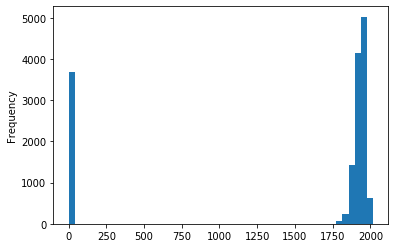

In [40]:
import matplotlib.pylab as plt
%matplotlib inline
artists.BeginDate.plot(kind='hist', bins = 50)

## How is missing data represented?

<img src="./img/artist_zero_is_missing.png" width=400>

We will fix this soon!

## Data Cleaning Step 3 - Dealing with a text column

#### Necessary steps

* Inspect a list of unique labels and their counts
    * Look at the most common and fix common errors
    * Look at the least common, odd cases hide here
* Plot the frequency distribution.  Anything unusual?
* How are missing data represented?  Is it consistent?
    * Switch to `np.NaN` (Pandas), `None` (pure Python), `null` (Spark SQL)
* Look for and fix similarities in the labels
    * i.e. "Todd" vs. "todd"

#### Optional steps

* Consider switching to lowercase
* Consider adding a `"Other"` category for rare labels
* Consider recoding into broader categories

## Inspecting text columns

* Stats: `value_counts()`
* Number of labels: `value_counts().shape

In [31]:
artists.Nationality.value_counts().shape # Number of unique labels

(118,)

In [32]:
artists.Nationality.value_counts()

American     5194
German        969
British       854
French        848
Italian       539
             ... 
Afghan          1
Guyanese        1
Sahrawi         1
Kuwaiti         1
Burkinabe       1
Name: Nationality, Length: 118, dtype: int64

## Inspecting text columns

* Plot: `value_counts().plot('bar')`

**Question:** Do you see any problems?

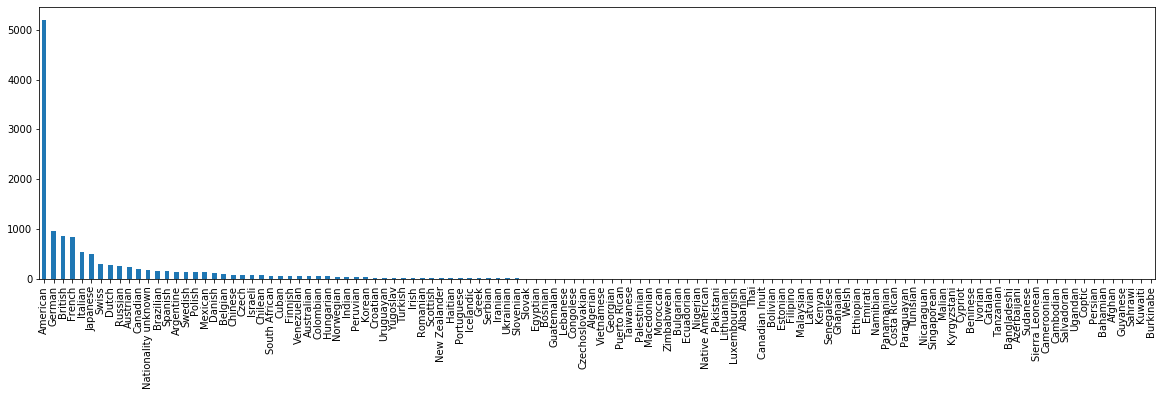

In [34]:
plt.figure(figsize=(20,5))
artists.Nationality.value_counts().plot(kind='bar')

## Be a Data Detective

<img src="./img/nationality_unknown.png" width=400>

## Using `head` to inspect the most common labels

Note that

* `value_counts` are sorted in descending order
* we can add `head` to the chain to 

In [35]:
artists.Nationality.value_counts().head(10)

American    5194
German       969
British      854
French       848
Italian      539
Japanese     509
Swiss        294
Dutch        277
Russian      267
Austrian     242
Name: Nationality, dtype: int64

## Using `head` with `plot`

Note that

* `value_counts` are sorted in descending order
* we can add `head` to the chain to 

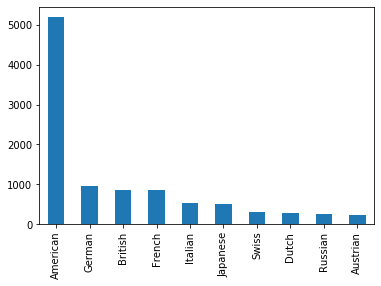

In [37]:
artists.Nationality.value_counts().head(10).plot(kind='bar')

## <font color="red"> Exercise 5 </font>
    
**Task:** Inspect the statistics and plots for `artwork`.  Be sure to look at one variable of each type.

In [41]:
artwork.Artist.value_counts().size

13684

In [42]:
artwork.Artist.value_counts().head(10)

Eugène Atget                5050
Louise Bourgeois            3336
Unknown photographer        2734
Ludwig Mies van der Rohe    2645
Jean Dubuffet               1435
Lee Friedlander             1320
Pablo Picasso               1309
Marc Chagall                1161
Henri Matisse               1063
Pierre Bonnard               901
Name: Artist, dtype: int64

In [43]:
artwork.Artist.value_counts()

Eugène Atget                          5050
Louise Bourgeois                      3336
Unknown photographer                  2734
Ludwig Mies van der Rohe              2645
Jean Dubuffet                         1435
                                      ... 
Fred Becker, T. Weiss                    1
Dorothy F. Markle, Harry C. Markle       1
Pierre Buraglio                          1
Rona Pondick                             1
Hap Sakwa                                1
Name: Artist, Length: 13684, dtype: int64

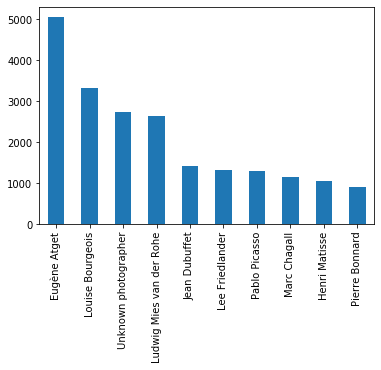

In [45]:
artwork.Artist.value_counts().head(10).plot(kind='bar')

In [46]:
artwork.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [48]:
artwork.Height_cm.describe()

AttributeError: 'DataFrame' object has no attribute 'Height_cm'

In [49]:
artwork.Height_cm.plot('hist', bins=50)

AttributeError: 'DataFrame' object has no attribute 'Height_cm'

## Data Cleaning Step 4 - Dealing with a date column

#### Necessary steps

* Is the formating consistent?
* Correct conversion?
    * Two digit year?  How is this converted?
* Make columns for various date-parts
    * year
    * month
    * day
    * etc.
* Make plots of the date-parts and look for unusual values

## Data Cleaning Step 5 - Inspect relationship between columns

#### Necessary steps

* Compute cross-tabulated summary methods
    * **Text + Numeric** Group-by mean/median/SD/IQR
    * **Text + Text** Group-by counts/percents
* Plot the relationship
    * **Text + Numeric** side-by-side box plot
    * **Text + Text** mosiac plot
    * **Numeric + Numeric** scatter plot
* Look for unusual values.
    * i.e. `0` as missing often shows up in scatterplots

# Preview of Coming Attractions

## R and Python can interact!

In [56]:
!pip install rpy2 tzlocal
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
%%R
rnorm(5, 2, 3)

[1]  0.6708727 -1.1897797  1.5928833 -2.6634741  7.9288089


## We love dplyr!

In [59]:
%%R -i artists -o output
library(dplyr)

(artists %>%
select(BeginDate, DisplayName, Nationality) %>%
filter(BeginDate > 0) %>%
head) -> output
output

AttributeError: 'float' object has no attribute 'encode'

## Wait ... did you just run R dplyr code in a jupyter notebook?
<img src='./img/r_magic_1.png' width=400>

#### Yep

## Wait ... did you just pass a `Pandas` dataframe to `dplyr`

<img src='./img/r_magic_2.png' width=400>

#### Yes ... yes I did.

## Wait ... OMG ... did you just pass the result BACK TO PYTHON!!1!one! 

<img src='./img/r_magic_3.png' width=400>

#### Ummm hmmmm

In [70]:
output

,BeginDate,DisplayName,Nationality
0,1930,Robert Arneson,American
1,1936,Doroteo Arnaiz,Spanish
2,1941,Bill Arnold,American
3,1946,Charles Arnoldi,American
4,1941,Per Arnoldi,Danish
5,1925,Danilo Aroldi,Italian


## HOLD ON! ... isn't that CHEATING!

#### ... maybe your right ...